In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

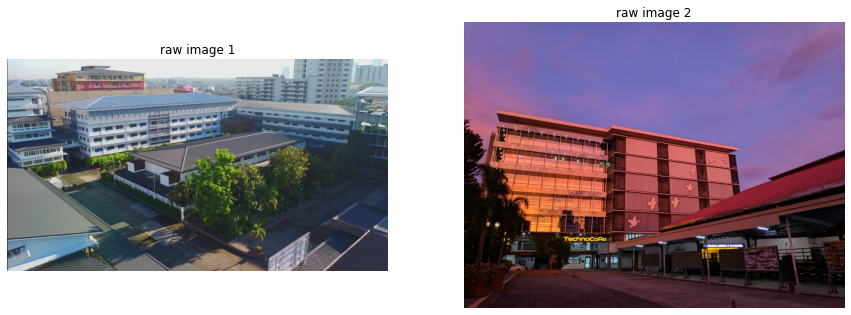

In [3]:
raw_img1 = load_image('annive_bldg.jpg')
raw_img2 = load_image('techno_core.jpg')

fig = plt.figure(figsize=(15, 15))

rows = 1
columns = 2

fig.add_subplot(rows, columns, 1)
plt.imshow(np.squeeze(raw_img1))
plt.axis('off')
plt.title("raw image 1");

fig.add_subplot(rows, columns, 2)
plt.imshow(np.squeeze(raw_img2))
plt.axis('off')
plt.title("raw image 2");

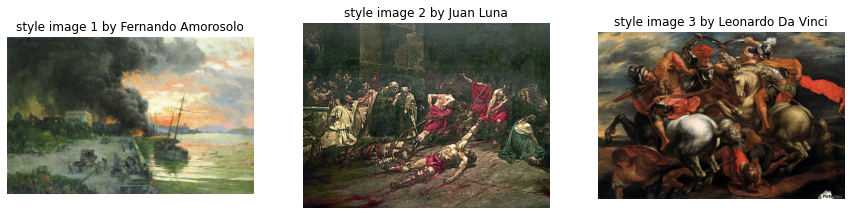

In [4]:
stl_img1 = load_image('Fern.jpg')
stl_img2 = load_image('Juan.jpg')
stl_img3 = load_image('Leon.jpg')

fig2 = plt.figure(figsize=(15, 15))

rows2 = 1
columns2 = 3

fig2.add_subplot(rows2, columns2, 1)
plt.imshow(np.squeeze(stl_img1))
plt.axis('off')
plt.title("style image 1 by Fernando Amorosolo");

fig2.add_subplot(rows2, columns2, 2)
plt.imshow(np.squeeze(stl_img2))
plt.axis('off')
plt.title("style image 2 by Juan Luna");

fig2.add_subplot(rows2, columns2, 3)
plt.imshow(np.squeeze(stl_img3))
plt.axis('off')
plt.title("style image 3 by Leonardo Da Vinci");

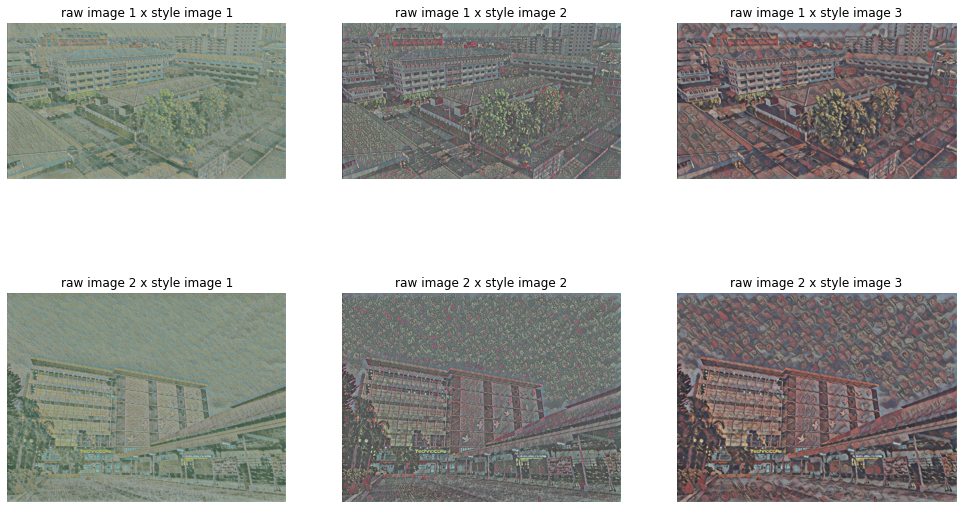

In [5]:
rslt_img1 = model(tf.constant(raw_img1), tf.constant(stl_img1))[0]
rslt_img2 = model(tf.constant(raw_img1), tf.constant(stl_img2))[0]
rslt_img3 = model(tf.constant(raw_img1), tf.constant(stl_img3))[0]
rslt_img4 = model(tf.constant(raw_img2), tf.constant(stl_img1))[0]
rslt_img5 = model(tf.constant(raw_img2), tf.constant(stl_img2))[0]
rslt_img6 = model(tf.constant(raw_img2), tf.constant(stl_img3))[0]

fig3 = plt.figure(figsize=(17, 10))

rows3 = 2
columns3 = 3

fig3.add_subplot(rows3, columns3, 1)
plt.imshow(np.squeeze(rslt_img1))
plt.axis('off')
plt.title("raw image 1 x style image 1");

fig3.add_subplot(rows3, columns3, 2)
plt.imshow(np.squeeze(rslt_img2))
plt.axis('off')
plt.title("raw image 1 x style image 2");

fig3.add_subplot(rows3, columns3, 3)
plt.imshow(np.squeeze(rslt_img3))
plt.axis('off')
plt.title("raw image 1 x style image 3");

fig3.add_subplot(rows3, columns3, 4)
plt.imshow(np.squeeze(rslt_img4))
plt.axis('off')
plt.title("raw image 2 x style image 1");

fig3.add_subplot(rows3, columns3, 5)
plt.imshow(np.squeeze(rslt_img5))
plt.axis('off')
plt.title("raw image 2 x style image 2");

fig3.add_subplot(rows3, columns3, 6)
plt.imshow(np.squeeze(rslt_img6))
plt.axis('off')
plt.title("raw image 2 x style image 3");

In [6]:
cv2.imwrite('anniv - Fern.jpg', cv2.cvtColor(np.squeeze(rslt_img1)*255, cv2.COLOR_BGR2RGB))
cv2.imwrite('anniv - Juan.jpg', cv2.cvtColor(np.squeeze(rslt_img2)*255, cv2.COLOR_BGR2RGB))
cv2.imwrite('anniv - Leon.jpg', cv2.cvtColor(np.squeeze(rslt_img3)*255, cv2.COLOR_BGR2RGB))
cv2.imwrite('techno - Fern.jpg', cv2.cvtColor(np.squeeze(rslt_img4)*255, cv2.COLOR_BGR2RGB))
cv2.imwrite('techno - Juan.jpg', cv2.cvtColor(np.squeeze(rslt_img5)*255, cv2.COLOR_BGR2RGB))
cv2.imwrite('techno - Leon.jpg', cv2.cvtColor(np.squeeze(rslt_img6)*255, cv2.COLOR_BGR2RGB))

True